In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bushraqurban/world-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/andrei/.cache/kagglehub/datasets/bushraqurban/world-health-indicators-dataset/versions/1


In [3]:
df = pd.read_csv('/Users/andrei/.cache/kagglehub/datasets/bushraqurban/world-health-indicators-dataset/versions/1/world_health_data.csv')
df.head(10)

,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Aruba,ABW,1999,NaN,73.561000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1999,NaN,51.258874,NaN,88.285642,38.433841,142.506373,6.684793,NaN,NaN
2,Afghanistan,AFG,1999,NaN,54.846000,NaN,94.600000,64.000000,135.800000,0.100000,NaN,NaN
3,Africa Western and Central,AFW,1999,NaN,49.726429,NaN,101.541373,44.733554,173.943151,NaN,NaN,NaN
4,Angola,AGO,1999,NaN,45.386000,NaN,123.500000,51.000000,208.000000,1.300000,NaN,NaN
5,Albania,ALB,1999,NaN,75.183000,NaN,25.200000,12.200000,28.500000,0.100000,NaN,NaN
6,Andorra,AND,1999,NaN,NaN,NaN,6.800000,3.700000,8.000000,NaN,NaN,NaN
7,Arab World,ARB,1999,NaN,66.716758,NaN,45.119240,26.049299,61.691579,0.104300,NaN,NaN
8,United Arab Emirates,ARE,1999,NaN,73.670000,NaN,8.500000,6.000000,10.900000,0.100000,NaN,NaN
9,Argentina,ARG,1999,NaN,73.722000,NaN,17.900000,11.100000,20.100000,0.300000,NaN,NaN


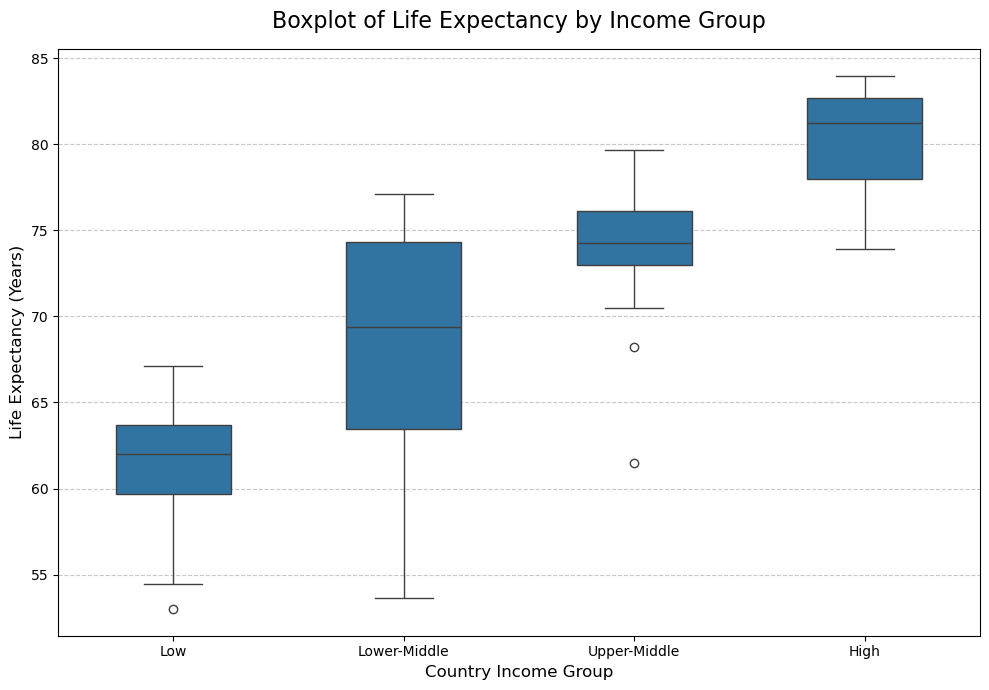

In [4]:
# 1. Define a mapping of Country Codes (ISO3) to Income Groups
# (This covers major economies to ensure a representative distribution)
income_group_map = {
    # High Income
    'USA': 'High', 'CAN': 'High', 'GBR': 'High', 'FRA': 'High', 'DEU': 'High', 
    'JPN': 'High', 'AUS': 'High', 'ITA': 'High', 'ESP': 'High', 'KOR': 'High',
    'SAU': 'High', 'NLD': 'High', 'CHE': 'High', 'SWE': 'High', 'SGP': 'High',
    'CHL': 'High', 'URY': 'High', 'ARE': 'High', 'ISR': 'High', 'NOR': 'High',
    'DNK': 'High', 'FIN': 'High', 'IRL': 'High', 'NZL': 'High', 'BEL': 'High',
    'AUT': 'High', 'PRT': 'High', 'GRC': 'High', 'POL': 'High', 'CZE': 'High',
    'HUN': 'High', 'SVK': 'High', 'EST': 'High', 'HRV': 'High', 'KWT': 'High',
    'QAT': 'High', 'OMN': 'High', 'BHR': 'High', 'PAN': 'High', 'CRI': 'High',
    
    # Upper Middle Income
    'CHN': 'Upper-Middle', 'BRA': 'Upper-Middle', 'RUS': 'Upper-Middle', 
    'MEX': 'Upper-Middle', 'ZAF': 'Upper-Middle', 'TUR': 'Upper-Middle', 
    'ARG': 'Upper-Middle', 'THA': 'Upper-Middle', 'COL': 'Upper-Middle', 
    'PER': 'Upper-Middle', 'MYS': 'Upper-Middle', 'IDN': 'Upper-Middle',
    'BGR': 'Upper-Middle', 'ROU': 'Upper-Middle', 'KAZ': 'Upper-Middle',
    'ECU': 'Upper-Middle', 'DOM': 'Upper-Middle', 'BLR': 'Upper-Middle',
    'ZAF': 'Upper-Middle', 'IRQ': 'Upper-Middle', 'PRY': 'Upper-Middle',
    
    # Lower Middle Income
    'IND': 'Lower-Middle', 'VNM': 'Lower-Middle', 'PHL': 'Lower-Middle', 
    'PAK': 'Lower-Middle', 'BGD': 'Lower-Middle', 'NGA': 'Lower-Middle', 
    'EGY': 'Lower-Middle', 'KEN': 'Lower-Middle', 'UKR': 'Lower-Middle', 
    'MAR': 'Lower-Middle', 'AGO': 'Lower-Middle', 'GHA': 'Lower-Middle', 
    'CIV': 'Lower-Middle', 'UZB': 'Lower-Middle', 'CMR': 'Lower-Middle',
    'TUN': 'Lower-Middle', 'BOL': 'Lower-Middle', 'LKA': 'Lower-Middle',
    'DZA': 'Lower-Middle', 'IRN': 'Lower-Middle',
    
    # Low Income
    'AFG': 'Low', 'ETH': 'Low', 'COD': 'Low', 'TZA': 'Low', 'UGA': 'Low', 
    'MOZ': 'Low', 'YEM': 'Low', 'MDG': 'Low', 'SDN': 'Low', 'BFA': 'Low', 
    'NER': 'Low', 'MLI': 'Low', 'MWI': 'Low', 'RWA': 'Low', 'TCD': 'Low',
    'SOM': 'Low', 'SSD': 'Low', 'SLE': 'Low', 'LBR': 'Low', 'CAF': 'Low',
    'GMB': 'Low', 'BDI': 'Low', 'TGO': 'Low'
}

plot_df = df[df['year'] == 2022].copy()

plot_df['Income Group'] = plot_df['country_code'].map(income_group_map)

plot_df = plot_df.dropna(subset=['Income Group', 'life_expect'])

order = ['Low', 'Lower-Middle', 'Upper-Middle', 'High']

plt.figure(figsize=(10, 7))
sns.boxplot(
    data=plot_df, 
    x='Income Group', 
    y='life_expect', 
    order=order,
    width=0.5
)

plt.title('Boxplot of Life Expectancy by Income Group', fontsize=16, pad=15)
plt.xlabel('Country Income Group', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

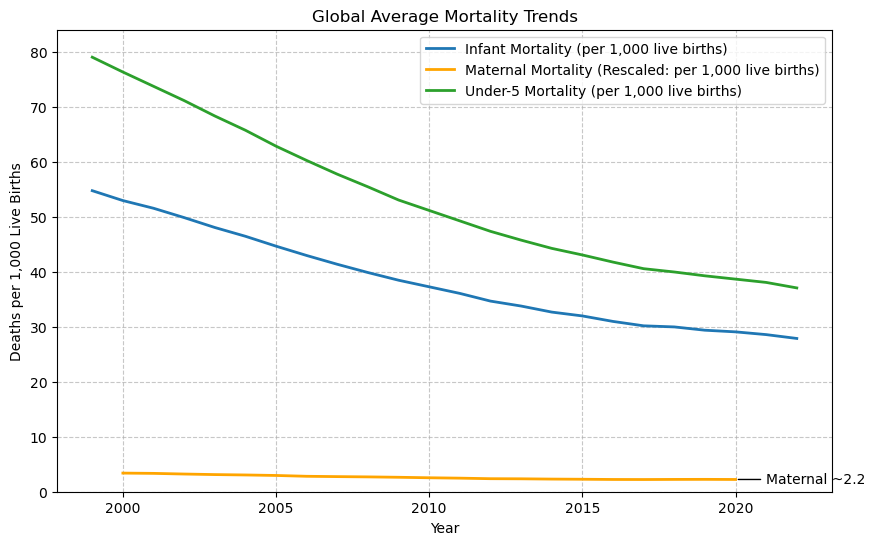

In [12]:
import matplotlib.pyplot as plt

# Filter for 'World' data
world_df = df[df['country'] == 'World'].copy()

# Sort by year just in case
world_df = world_df.sort_values('year')

# Create the scaled column
# Maternal mortality is per 100,000. To get per 1,000, divide by 100.
world_df['maternal_mortality_scaled'] = world_df['maternal_mortality'] / 100

# Plotting
plt.figure(figsize=(10, 6))

# Plot Infant Mortality
plt.plot(world_df['year'], world_df['infant_mortality'], 
         label='Infant Mortality (per 1,000 live births)', color='tab:blue', linewidth=2)

# Plot Maternal Mortality (Scaled)
# Filter out NaNs for plotting to avoid issues, though matplotlib usually handles them
mask_maternal = world_df['maternal_mortality_scaled'].notna()
plt.plot(world_df.loc[mask_maternal, 'year'], world_df.loc[mask_maternal, 'maternal_mortality_scaled'], 
         label='Maternal Mortality (Rescaled: per 1,000 live births)', color='orange', linewidth=2)

# Plot Under-5 Mortality
plt.plot(world_df['year'], world_df['under_5_mortality'], 
         label='Under-5 Mortality (per 1,000 live births)', color='tab:green', linewidth=2)

plt.title('Global Average Mortality Trends')
plt.ylabel('Deaths per 1,000 Live Births')
plt.xlabel('Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust limits to match the "zoomed in" look if needed, but auto is usually fine.
# The previous chart had ylim roughly 0 to 70.
plt.ylim(0, max(world_df['under_5_mortality'].max(), world_df['maternal_mortality_scaled'].max()) + 5)

# Add annotation similar to the previous thought
# Find a point to annotate for Maternal Mortality
if not world_df.loc[mask_maternal].empty:
    last_year = world_df.loc[mask_maternal, 'year'].max()
    last_val = world_df.loc[mask_maternal, 'maternal_mortality_scaled'].iloc[-1]
    plt.annotate(f'Maternal ~{last_val:.1f}', xy=(last_year, last_val), xytext=(last_year+1, last_val),
                 arrowprops=dict(facecolor='black', arrowstyle='-'), verticalalignment='center')

plt.savefig('mortality_trends_from_csv.png')

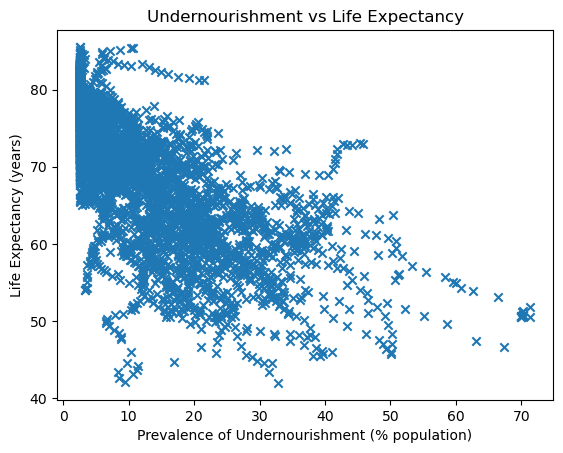

In [19]:
df_scatter = df[['prev_undernourishment','life_expect']].dropna()

plt.figure()
plt.scatter(df_scatter['prev_undernourishment'], df_scatter['life_expect'], marker='x')
plt.xlabel('Prevalence of Undernourishment (% population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Undernourishment vs Life Expectancy')
plt.show()